In [1]:
# Данные тут
# https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k/data


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime

In [2]:
temp = pd.read_csv('births.csv')
display(temp.head(3))
display(temp.tail(3))
temp.info()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454


,year,month,day,gender,births
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [3]:
df = temp.pivot(index=['year','month','day'], columns='gender', values='births').reset_index()
display(df.describe())

df = df.replace({'day': 99}, np.nan)
df.dropna(inplace = True)
df.reset_index(drop=True)

#df.describe()


gender,year,month,day,F,M
count,7807.000000,7807.000000,7567.000000,7776.000000,7771.000000
mean,1979.041885,6.515051,18.043610,9521.067773,10003.674559
std,6.721914,3.449983,15.926234,27868.629759,29220.529186
min,1969.000000,1.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4257.000000,4478.500000
50%,1979.000000,7.000000,16.000000,4688.500000,4938.000000
75%,1984.000000,10.000000,24.000000,5150.000000,5422.500000
max,2008.000000,12.000000,99.000000,191495.000000,199622.000000


gender,year,month,day,F,M
0,1969,1,1.0,4046.0,4440.0
1,1969,1,2.0,4454.0,4548.0
2,1969,1,3.0,4548.0,4994.0
3,1969,1,4.0,4440.0,4520.0
4,1969,1,5.0,4192.0,4198.0
...,...,...,...,...,...
7344,1988,12,27.0,5633.0,5895.0
7345,1988,12,28.0,5858.0,5989.0
7346,1988,12,29.0,5760.0,5944.0
7347,1988,12,30.0,5742.0,6095.0


In [4]:
df.index = pd.PeriodIndex(year=df.year, month=df.month, day=df.day, freq='D')
df['Sum'] = df[['F','M']].sum(axis = 1)
df['week'] =  df.index.dayofweek
#birhts = df.drop(['year','month','day'], axis = 1).copy()
birhts = df.copy()
birhts

gender,year,month,day,F,M,Sum,week
1969-01-01,1969,1,1.0,4046.0,4440.0,8486.0,2
1969-01-02,1969,1,2.0,4454.0,4548.0,9002.0,3
1969-01-03,1969,1,3.0,4548.0,4994.0,9542.0,4
1969-01-04,1969,1,4.0,4440.0,4520.0,8960.0,5
1969-01-05,1969,1,5.0,4192.0,4198.0,8390.0,6
...,...,...,...,...,...,...,...
1988-12-27,1988,12,27.0,5633.0,5895.0,11528.0,1
1988-12-28,1988,12,28.0,5858.0,5989.0,11847.0,2
1988-12-29,1988,12,29.0,5760.0,5944.0,11704.0,3
1988-12-30,1988,12,30.0,5742.0,6095.0,11837.0,4


<AxesSubplot:>

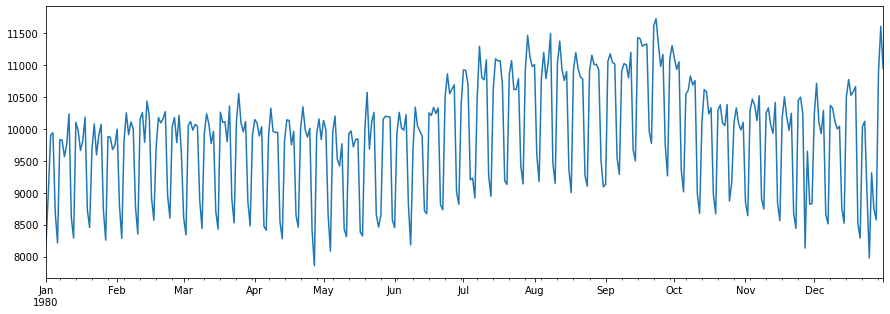

In [68]:
years_1980 = df.loc['1980']['Sum'].copy()
plt.figure(figsize=(15, 5))
years_1980.plot()

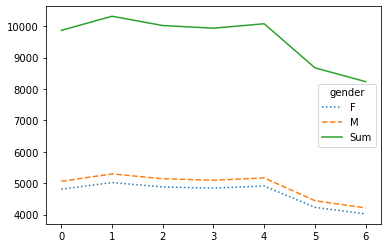

In [5]:
weekly = birhts.groupby(birhts.index.dayofweek)[['F','M','Sum']].mean()
g=weekly.plot(style=[':','--','-'])
#week_name=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
#week_day.index=week_name



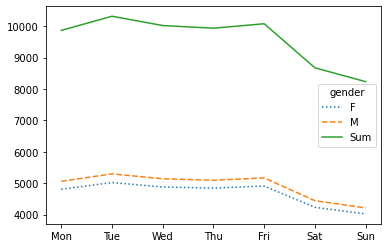

In [6]:
weekly = birhts.groupby(birhts.index.dayofweek)[['F','M','Sum']].mean()
week_name=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekly.index=week_name

g=weekly.plot(style=[':','--','-'])


<AxesSubplot:>

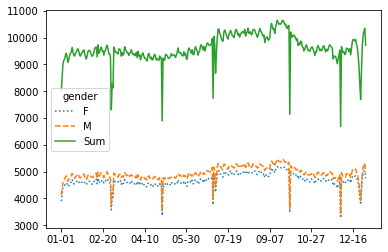

In [7]:
years = df.copy()
years.index = years.index.strftime('%m-%d')
years = years.groupby(years.index)[['F','M','Sum']].mean()
years.plot(style=[':','--','-'])

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=7349, freq=None)

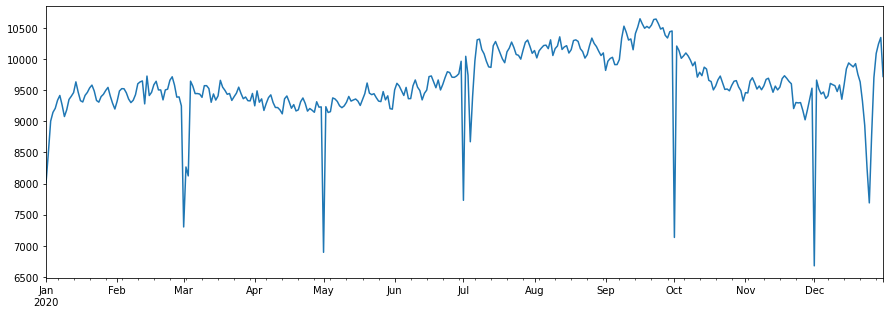

In [164]:
years = df.copy()
years.index = years.index.strftime('2020-%m-%d')
years.index = pd.to_datetime(years.index)
plt.figure(figsize=(15, 5))
years.groupby(years.index)['Sum'].mean().plot()
years.index

In [67]:
import holidays
holi_2020 = pd.Series(holidays.US(years=[2020]))
holi_2020

2020-01-01                 New Year's Day
2020-01-20     Martin Luther King Jr. Day
2020-02-17          Washington's Birthday
2020-05-25                   Memorial Day
2020-07-04               Independence Day
2020-07-03    Independence Day (Observed)
2020-09-07                      Labor Day
2020-10-12                   Columbus Day
2020-11-11                   Veterans Day
2020-11-26                   Thanksgiving
2020-12-25                  Christmas Day
dtype: object

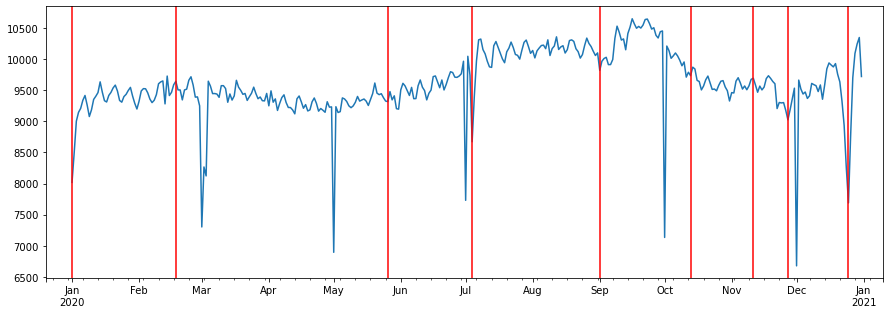

In [166]:
import holidays
holi = pd.Series(holidays.US(years=[1980]))
holi.index = pd.to_datetime(holi.index).strftime('2020-%m-%d')

years_d = years.drop(pd.Timestamp('2020-02-29'))
years_mean = years.groupby(years.index)['Sum'].mean()

plt.figure(figsize=(15, 5))
years_mean.plot(xlim=('2019-12-20','2021-1-10'))
[plt.axvline(vline,color="red") for vline in holi.index]
plt.show()

In [213]:
mask = years.loc['2020-04-27':'2020-05-03'][['F','M','Sum']].describe()
mask

gender,F,M,Sum
count,147.000000,147.000000,147.000000
mean,4267.972789,4520.625850,8788.598639
std,1091.412174,1150.976186,2239.235268
min,2.000000,2.000000,4.000000
25%,4036.500000,4250.000000,8325.000000
50%,4393.000000,4620.000000,9045.000000
75%,4914.000000,5191.500000,10122.500000
max,5538.000000,5803.000000,11329.000000


In [208]:
# Почему значение 0,74? 
# Основным свойством нормального / гауссовского распределения является то, 
# что 50% значений находятся на максимальном расстоянии 0,67 σ от среднего значения 
# (IQR, см. Это изображение из этой статьи). 0,74 = 1 / (2x0,67). 
# «Устойчивый» означает, что на него не влияют аномальные экстремальные значения 
# (выбросы находятся за пределами IQR, поэтому не используются для оценки σ)


import scipy as sp
p1 = sp.stats.norm.ppf(0.25)  # first quartile of standard normal distribution
p2 = sp.stats.norm.ppf(0.75)  # third quartile
print(p2 - p1)  # 1.3489795003921634

sig = 1  # standard deviation of the standard normal distribution  
factor = sig / (p2 - p1)
print(factor)  # 0.74130110925280102


1.3489795003921634
0.741301109252801


In [205]:
quartiles = np.percentile(years['Sum'], [25, 50, 75])
mu = quartiles[1]
sig = 0.7413 * (quartiles[2] - quartiles[0])
births = years.query('(Sum > @mu - 5 * @sig) & (Sum < @mu + 5 * @sig)')
births

gender,year,month,day,F,M,Sum,week
2020-01-01,1969,1,1.0,4046.0,4440.0,8486.0,2
2020-01-02,1969,1,2.0,4454.0,4548.0,9002.0,3
2020-01-03,1969,1,3.0,4548.0,4994.0,9542.0,4
2020-01-04,1969,1,4.0,4440.0,4520.0,8960.0,5
2020-01-05,1969,1,5.0,4192.0,4198.0,8390.0,6
...,...,...,...,...,...,...,...
2020-12-27,1988,12,27.0,5633.0,5895.0,11528.0,1
2020-12-28,1988,12,28.0,5858.0,5989.0,11847.0,2
2020-12-29,1988,12,29.0,5760.0,5944.0,11704.0,3
2020-12-30,1988,12,30.0,5742.0,6095.0,11837.0,4


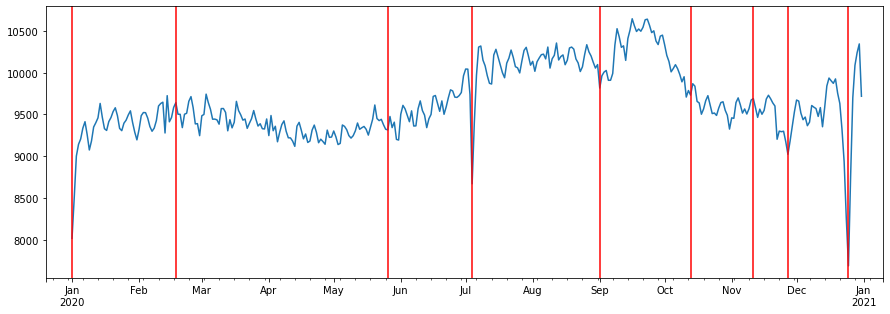

In [203]:
years_mean = births.groupby(births.index)['Sum'].mean()

plt.figure(figsize=(15, 5))
years_mean.plot(xlim=('2019-12-20','2021-1-10'))
[plt.axvline(vline,color="red") for vline in holi.index]
plt.show()

In [196]:
100/68.2

1.466275659824047

In [201]:
1/1.466

0.6821282401091405